# The packages

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from matplotlib import colors
from matplotlib import cm

In [4]:
#from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
import networkx as nx

# Read zachary dataset

In [6]:
G = nx.karate_club_graph()

In [7]:
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [8]:
pos = nx.spring_layout(G)

In [9]:
def draw_communities(G, membership, pos):
    fig, ax = plt.subplots(figsize=(16,9))
    
    # Convert membership list to a dict where key=club, value=list of students in club
    club_dict = defaultdict(list)
    for student, club in enumerate(membership):
        club_dict[club].append(student)
    
    # Normalize number of clubs for choosing a color
    norm = colors.Normalize(vmin=0, vmax=len(club_dict.keys()))
    
    for club, members in club_dict.items():
        nx.draw_networkx_nodes(G, pos,
                               nodelist=members,
                               node_color=cm.jet(norm(club)),
                               node_size=500,
                               alpha=0.8,
                               ax=ax)

    # Draw edges (social connections) and show final plot
    plt.title("Zachary's Karate Club")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

In [10]:
# True labels of the group each student (node) unded up in. Found via the original paper
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


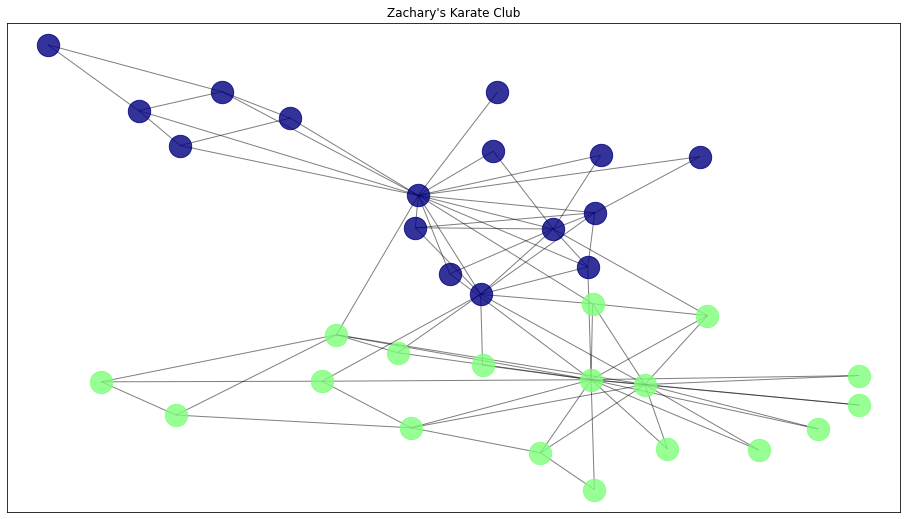

In [11]:
draw_communities(G, y_true, pos)

In [12]:
edge_mat= nx.to_numpy_array(G, nodelist=[i for i in range(34)])
edge_mat

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [16]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(edge_mat)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


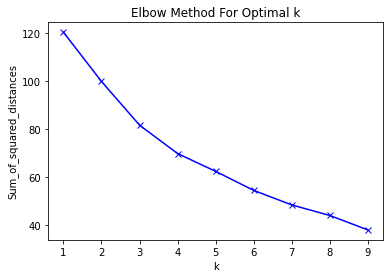

In [17]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
from kneed import KneeLocator
kn = KneeLocator(K, Sum_of_squared_distances, curve='convex', direction='decreasing')
print(kn.knee)

4


# Silhouette

In [19]:
#librairie pour évaluation des partitions
from sklearn import metrics
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = KMeans(n_clusters=k+2, n_init=1000)
    km.fit(edge_mat)
    res[k] = metrics.silhouette_score(edge_mat,km.labels_)
print(res)

[0.35121172 0.1901858  0.1891658  0.19529867 0.20229107 0.20636577
 0.20521096 0.1919609  0.19180275]


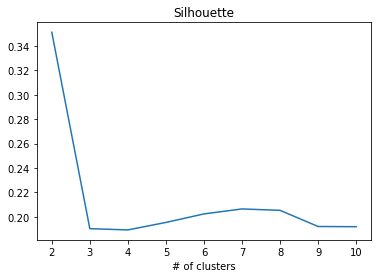

In [20]:
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [28]:
kmeans = KMeans(n_clusters=kn.knee, max_iter=20000, n_init=1, random_state=0)

In [29]:
#Communities
label=kmeans.fit_predict(edge_mat)
for i in (label):
    print(i)

0
2
2
2
2
2
2
2
1
1
2
2
2
2
1
1
2
2
1
2
1
2
1
1
2
2
1
1
1
1
1
1
3
3


In [30]:
#convert to DataFrame
lab = pd.DataFrame(label, columns=['center'])
colm = [x for x in range(34)]
lab['Node'] = colm
lab

,center,Node
0,0,0
1,2,1
2,2,2
3,2,3
4,2,4
5,2,5
6,2,6
7,2,7
8,1,8
9,1,9


In [31]:
#Community of each Node
community = lab
community

,center,Node
0,0,0
1,2,1
2,2,2
3,2,3
4,2,4
5,2,5
6,2,6
7,2,7
8,1,8
9,1,9


In [25]:
gk = community.groupby('center')
gk.first()

,Node
center,
0,0
1,2


In [26]:
#Regrouper les communitées dans une  list comm
#à l'intérieur de chaque liste on trouve les noeuds appartient à une communauté 
comm = []
for i in range(2):
    comm.append(gk.get_group(i)['Node'].tolist())
    
comm[1]

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

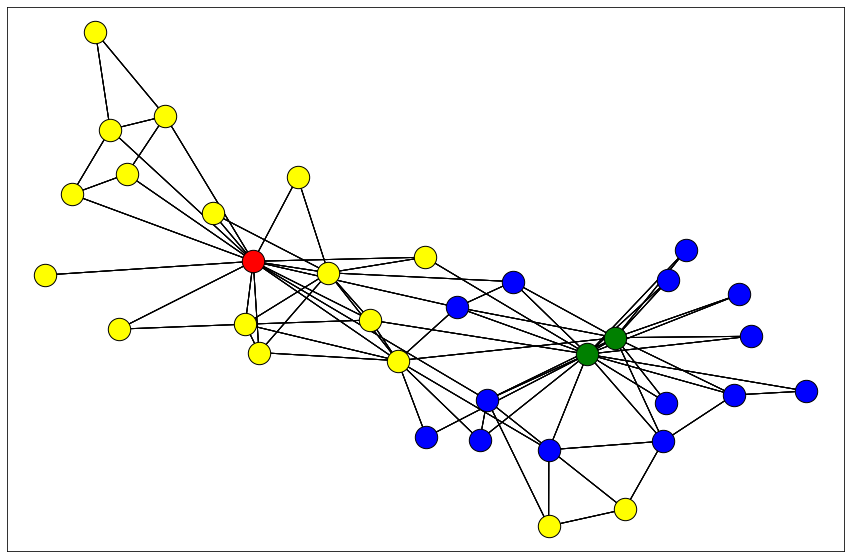

In [32]:
plt.rcParams.update({'figure.figsize': (15, 10)})
colors=['red','blue','yellow','green','lightblue','white','brown','grey','purple','pink','orange','gold','olive']
for i in range(4):
    nx.draw_networkx(G, pos=pos, nodelist=comm[i], node_color= colors[i],with_labels=False,node_size=500, font_size=8,
        edgecolors='black')